# Milestone 2 - CasierVert952

## Idea of project

TODO : Small text expliquant vite fait le projet

## Data

This data analysis will be conduct on two available datasets. The data come from two different beers rating websites :

- BeerAdvocate
- RateBeer

Moreover, we will also use external data ... TODO

> *In the following: BeerAdvocate will be abbreviated as BA and RateBeer as RB.*

> *For improved readability, the complex and long functions developed for this analysis have been moved to ```helpers.py```. We import these functions into the relevant cells as needed.*

## 0. Initial configuration

### 0.1 Data preprocessing

In this phase, we will start by demonstrating how we transformed the ```TXT``` ratings files (for both BA and RB) into CSV format. Next, we will merge the various data files and rename the columns to create a dataframes containing all available feature for each of the datasets. Afterward we will clean and modify some features such as dates and locations to meet our needs. Finally, we will save the cleaned data into ```CSV``` files to be able to load them quickly.

This step can be found on [data_preprocessing.ipynb](data_preprocessing.ipynb), which has to be entirely executed once to be able to run the following cells.

The ```data``` directory should now look like this :

```
data/
├── BeerAdvocate
│   ├── beers.csv
│   ├── breweries.csv
│   ├── users.csv
│   ├── ratings.csv
│   └── BA_cleaned.csv
│
└── RateBeer
    ├── beers.csv
    ├── breweries.csv
    ├── users.csv
    ├── ratings.csv
    └── RB_cleaned.csv
```

### 0.2 Importation of libraries and golbal variable declarations

In [1]:
# Import the basic requiered libraries
import os
import csv
import time
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import warnings

# Path variables
BA_DATA_PATH = "data/BeerAdvocate/"
RB_DATA_PATH = "data/RateBeer/"

## 1. Data loading and visualization

### 1.1 Loading cleaned data

The preprocessing task having already been done, we just have to directly load the cleaned data.

In [2]:
# Create Dataframes for the BA cleaned data
s_time = time.time()
BA_cleaned = pd.read_csv(BA_DATA_PATH + 'BA_cleaned.csv', low_memory=False)
e_time = time.time()
print("Loading of BA data ended in " + str(e_time - s_time) + " seconds.")

# Create Dataframes for the RB cleaned data
s_time = time.time()
RB_cleaned = pd.read_csv(RB_DATA_PATH + 'RB_cleaned.csv', low_memory=False)
e_time = time.time()
print("Loading of RB data ended in " + str(e_time - s_time) + " seconds.")

# Loading extra data useful for "Data exploration"
BA_beers = pd.read_csv(BA_DATA_PATH + 'beers.csv')
BA_breweries = pd.read_csv(BA_DATA_PATH + 'breweries.csv')
BA_users = pd.read_csv(BA_DATA_PATH + 'users.csv')
RB_beers = pd.read_csv(RB_DATA_PATH + 'beers.csv')
RB_breweries = pd.read_csv(RB_DATA_PATH + 'breweries.csv')
RB_users = pd.read_csv(RB_DATA_PATH + 'users.csv')

Loading of BA data ended in 42.4769926071167 seconds.
Loading of RB data ended in 31.436043739318848 seconds.


### 1.2 Data visualization

The following illustrates the structure of our data after preprocessing. In the future analysis, we will create derived DataFrames from ```BA_cleaned``` and ```RB_cleaned``` by copying them and then, removing, modifying, and adding features to these copies as needed.

In [3]:
# Display 4 samples of the BA dataset
print("Visualization of BA :")
display(BA_cleaned.sample(3).T)
print("\nVisualization of RB :")
display(RB_cleaned.sample(3).T)

Visualization of BA :


,7248291,185509,3528907
rating_date,12-2015,11-2012,01-2012
rating_appearance,4.75,NaN,NaN
rating_aroma,5.0,NaN,NaN
rating_palate,4.75,NaN,NaN
rating_taste,5.0,NaN,NaN
rating_overall,4.75,NaN,NaN
rating,4.91,3.25,4.5
beer_id,179485,63544,37298
beer_name,Snowed In - Bourbon Barrel Aged,Fade To Black (Volume 2 - Smoked Baltic Porter),Dark Force
beer_style,American Porter,Baltic Porter,Russian Imperial Stout



Visualization of RB :


,6798901,890117,2056029
rating_date,07-2016,12-2015,09-2009
rating_appearance,4,3,3
rating_aroma,8,7,6
rating_palate,4,4,3
rating_taste,7,7,5
rating_overall,15,13,10
rating,3.8,3.4,2.7
beer_id,215485,174058,2533
beer_name,Allendale Export Stout,Leffe Royale (Whitbread Golding),Kona Longboard Island Lager
beer_style,Stout,Belgian Strong Ale,Pale Lager


## 2 Data exploration of both datasets

Indeed, we are given two different but very similar datasets to perform our analysis. Let's begin by examining them to determine the best approach: using one dataset, combining both, or creating a blend of the two.

### 2.1 Sizes

We will firstly interrest ourself to their size

In [4]:
# Printing the sizes of each Dataframe for both datasets.
print("BA :")
print("   Number of ratings   : " + str(BA_cleaned.shape[0]))
print("   Number of beers     : " + str(BA_beers.shape[0]))
print("   Number of breweries : " + str(BA_breweries.shape[0]))
print("   Number of users     : " + str(BA_users.shape[0]))
print("\nRB :")
print("   Number of ratings   : " + str(RB_cleaned.shape[0]))
print("   Number of beers     : " + str(RB_beers.shape[0]))
print("   Number of breweries : " + str(RB_breweries.shape[0]))
print("   Number of users     : " + str(RB_users.shape[0]))

BA :
   Number of ratings   : 8392192
   Number of beers     : 280823
   Number of breweries : 16758
   Number of users     : 153704

RB :
   Number of ratings   : 7123070
   Number of beers     : 442081
   Number of breweries : 24189
   Number of users     : 70174


The RB dataset contains more data on different beers and breweries, but less users than the BA one. Both datasets have more than 7 millions of user's ratings, which seems at first sight enough to perfom our analysis.

### 2.2 Missing values

We will check how many value are missing the features columns. It will help us to decide what to remove during the "Data refinement" phase.

In [5]:
# Computing missing values by columns
missing_count_BA = BA_cleaned.isna().sum()
missing_percentage_BA = (missing_count_BA / len(BA_cleaned)) * 100
missing_count_RB = RB_cleaned.isna().sum()
missing_percentage_RB = (missing_count_RB / len(RB_cleaned)) * 100

# Puting results in a dataframe
missing_data_BA = pd.DataFrame({
    'Column': BA_cleaned.columns,
    'Missing Values (BA)': missing_count_BA,
    '% (BA)': missing_percentage_BA
})
missing_data_RB = pd.DataFrame({
    'Column': RB_cleaned.columns,
    'Missing Values (RB)': missing_count_RB,
    '% (RB)': missing_percentage_RB
})

# Sorting by "%"
missing_data_BA = missing_data_BA.sort_values(by='% (BA)', ascending=False)
missing_data_RB = missing_data_RB.sort_values(by='% (RB)', ascending=False)

# Print results
display(missing_data_BA, missing_data_RB)

,Column,Missing Values (BA),% (BA)
beer_avg_matched_valid_ratings,beer_avg_matched_valid_ratings,7464671,88.947810
beer_zscore,beer_zscore,7436327,88.610068
beer_bros_score,beer_bros_score,5283785,62.960726
rating_aroma,rating_aroma,3622979,43.170831
rating_palate,rating_palate,3622979,43.170831
rating_taste,rating_taste,3622979,43.170831
rating_overall,rating_overall,3622979,43.170831
rating_appearance,rating_appearance,3622979,43.170831
breweries_state,breweries_state,1481852,17.657508
user_state,user_state,1089052,12.976967


,Column,Missing Values (RB),% (RB)
beer_zscore,beer_zscore,6102391,85.670799
beer_avg_matched_valid_ratings,beer_avg_matched_valid_ratings,6102391,85.670799
breweries_state,breweries_state,4111124,57.715620
user_state,user_state,4014385,56.357512
overall_score,overall_score,861022,12.087794
style_score,style_score,844833,11.860518
user_country,user_country,203670,2.859301
user_location,user_location,203670,2.859301
beer_abv,beer_abv,174964,2.456300
user_join_date,user_join_date,2625,0.036852


#### TODO

we saw that ...

### 2.3 Country Representation

As our study will mainly focus on specific countries (the USA and European ones), we investigate the representation of countries in both datasets. This will assist us in selecting the most appropriate dataset for our final analyses.

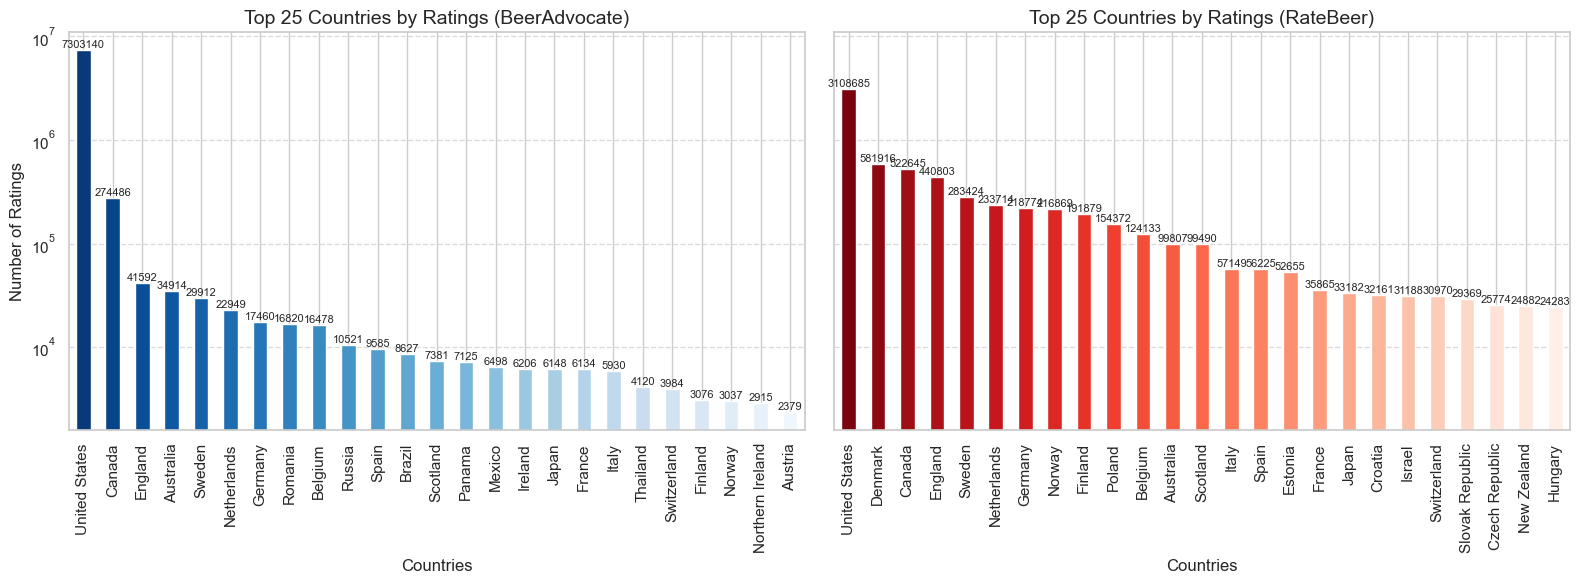

In [6]:
from helpers import ploting_country_representation

# Calculer le nombre de ratings par pays pour chaque DataFrame
BA_count_per_country = BA_cleaned.groupby('user_country').size().nlargest(25)
RB_count_per_country = RB_cleaned.groupby('user_country').size().nlargest(25)

ploting_country_representation(BA_count_per_country, RB_count_per_country, 'log')

In [7]:
# Country ratings with precise values
country_comparison = pd.DataFrame({
    'Country (BA)': BA_count_per_country.index,
    '# of Ratings (BeerAdvocate)': BA_count_per_country.values,
    '% of Ratings (BeerAdvocate)': np.round(BA_count_per_country.values / len(BA_cleaned) * 100, 2),
    'Country (RB)': RB_count_per_country.index,
    '# of Ratings (RateBeer)': RB_count_per_country.reindex(RB_count_per_country.index, fill_value=0).values,
    '% of Ratings (RateBeer)': np.round(RB_count_per_country.reindex(RB_count_per_country.index, fill_value=0).values / len(RB_cleaned) * 100, 2)
})
country_comparison.index = range(1, len(country_comparison) + 1)
country_comparison.head(10)

,Country (BA),# of Ratings (BeerAdvocate),% of Ratings (BeerAdvocate),Country (RB),# of Ratings (RateBeer),% of Ratings (RateBeer)
1,United States,7303140,87.02,United States,3108685,43.64
2,Canada,274486,3.27,Denmark,581916,8.17
3,England,41592,0.50,Canada,522645,7.34
4,Australia,34914,0.42,England,440803,6.19
5,Sweden,29912,0.36,Sweden,283424,3.98
6,Netherlands,22949,0.27,Netherlands,233714,3.28
7,Germany,17460,0.21,Germany,218774,3.07
8,Romania,16820,0.20,Norway,216869,3.04
9,Belgium,16478,0.20,Finland,191879,2.69
10,Russia,10521,0.13,Poland,154372,2.17


As evident from the plots and tables above, the BA dataset mainly consists of ratings from the US (92.5%), while the RB dataset contains a more balanced distribution, with approximately half of the ratings originating from the US and the other half from European countries.

Based on these results, it would be adequate to utilize the BA dataset for our analyses focused on the US, while the RB dataset would be more suitable for our analyses concerning Europe.

### 2.4 Ratings distribution over users

It is interessant to expolore the quantity of ratings that each user has published. Do we give more importance to regular users than to occasional ones ? Are users who have thousands and thousands of ratings relevant ? Areotheses usersbiasingt our result s?

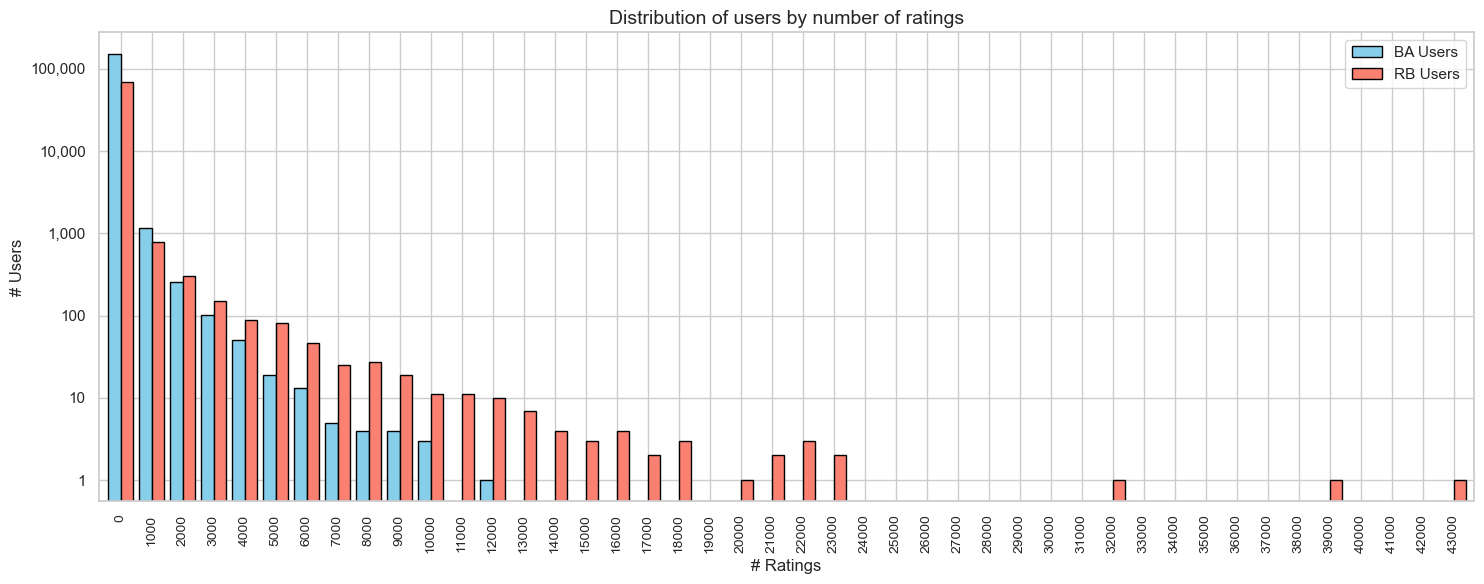

In [8]:
from helpers import ploting_user_ratings_distribution

# Computing the #ratings by users, and grouping them in bins of size 1000
BA_ratings_by_user = BA_cleaned.groupby('user_id').size().reset_index(name='#ratings')
BA_ratings_bins = pd.cut(BA_ratings_by_user['#ratings'], bins=np.arange(0, BA_ratings_by_user['#ratings'].max() + 1000, 1000))
BA_ratings_bins = BA_ratings_bins.value_counts().sort_index()

RB_ratings_by_user = RB_cleaned.groupby('user_id').size().reset_index(name='#ratings')
RB_ratings_bins = pd.cut(RB_ratings_by_user['#ratings'], bins=np.arange(0, RB_ratings_by_user['#ratings'].max() + 1000, 1000))
RB_ratings_bins = RB_ratings_bins.value_counts().sort_index()

# Only show the minial value of the bins in the graph
BA_ratings_bins.index = [f'{int(bin.left)}' for bin in BA_ratings_bins.index]
RB_ratings_bins.index = [f'{int(bin.left)}' for bin in RB_ratings_bins.index]

# Ploting the #ratings by users data
ploting_user_ratings_distribution(BA_ratings_bins, RB_ratings_bins)

#### TODO the ratings by user analyse

We say that ...

### 2.5 Ratings distribution over months

In our analyses, we will compare political properties with beer properties over time. It is important to examine the distribution of ratings across different months to ensure the relevance and validity of our results.

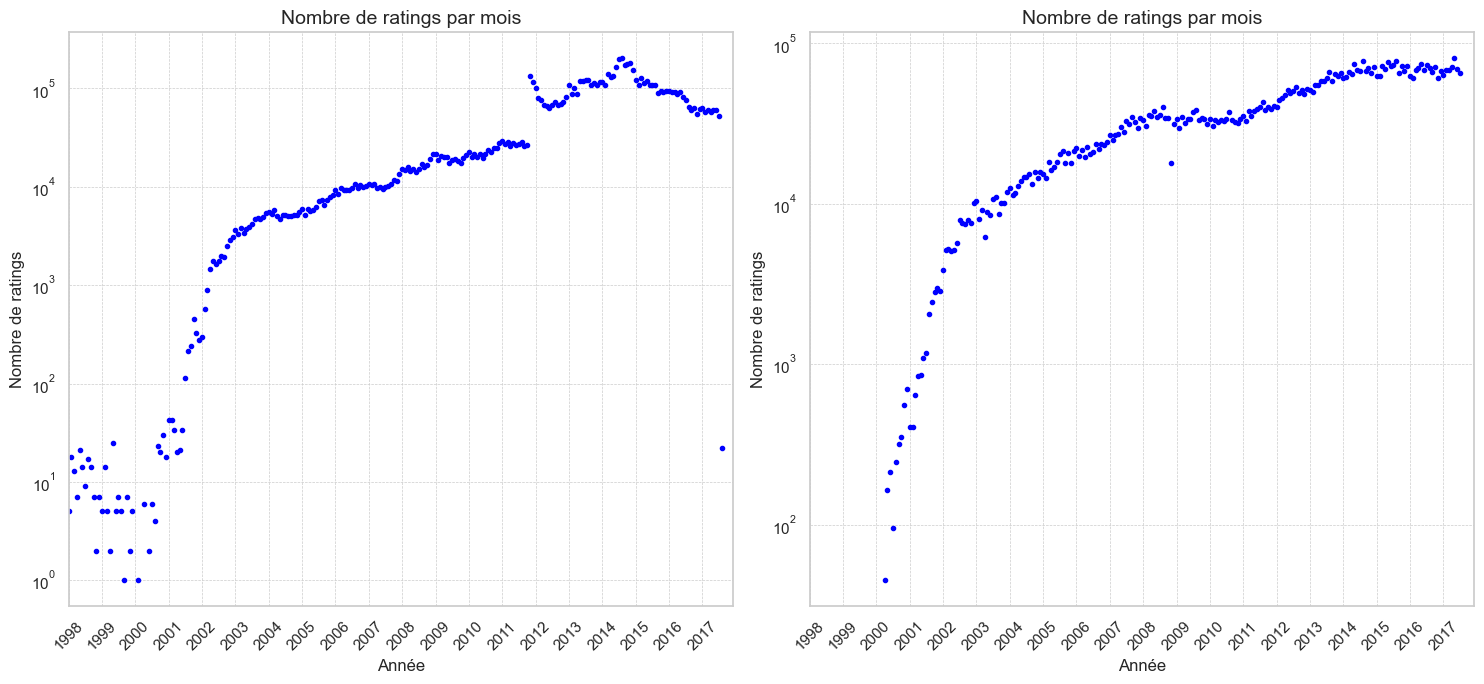

In [9]:
from helpers import ploting_ratings_by_month

# Computing the #ratings by month
BA_ratings_by_month = BA_cleaned.groupby('rating_date').size().reset_index(name='#ratings').sort_index()
BA_ratings_by_month['rating_date'] = pd.to_datetime(BA_ratings_by_month['rating_date'], format='%m-%Y')

RB_ratings_by_month = RB_cleaned.groupby('rating_date').size().reset_index(name='#ratings').sort_index()
RB_ratings_by_month['rating_date'] = pd.to_datetime(RB_ratings_by_month['rating_date'], format='%m-%Y')

# Ploting the #ratings by months data
ploting_ratings_by_month(BA_ratings_by_month, RB_ratings_by_month, "log")

For BeerAdvocate :

Before 2002, the number of user ratings each month is very low (under 1000), which may pose problems for conducting a reliable statistical analysis. On the contrary, starting from 2007, there are more than 10,000 ratings per month, providing a solid foundation for more precise analyses. It can also be noted that starting from 2012, the data shows significant volatility, with the number of ratings varying greatly from one month to the next one.

For RateBeer :

Before 2003, there is limited data, but after that year, the graph shows a consistent increase of data every month. This suggests that we can have more confidence in our results for the later years.

## 3. Data refinement

In this section, we will discuss our choice of removing some features and some ratings elements due to the quality of the data and the needs we have for it.

TODO Discuter de quelles données on veut supprimer !!

### 3.1 Removing the missing countries

The contry in which the ratings where made is crucial for our analysis, so we decided to remove the ratings where the country field is missing.

In [10]:
# Dropping the element with no country field
BA_cleaned = BA_cleaned.dropna(subset=['user_country'])
RB_cleaned = RB_cleaned.dropna(subset=['user_country'])

## 4. External dataset used

## 5. Analysis : Relation Beer vs Political

Partie de Samuel pour creer un dataframe pour les USA et commencer les analyses.

In [11]:
#Create Dataframe of only USA users
RB_usa = RB_cleaned.copy()[RB_cleaned['user_country'].str.contains('United States', case=False, na=False)]
BA_usa = BA_cleaned.copy()[BA_cleaned['user_country'].str.contains('United States', case=False, na=False)]
RB_usa.columns

Index(['rating_date', 'rating_appearance', 'rating_aroma', 'rating_palate',
       'rating_taste', 'rating_overall', 'rating', 'beer_id', 'beer_name',
       'beer_style', 'beer_nbr_ratings', 'overall_score', 'style_score',
       'beer_avg', 'beer_abv', 'beer_avg_computed', 'beer_zscore',
       'beer_nbr_matched_valid_ratings', 'beer_avg_matched_valid_ratings',
       'brewery_id', 'brewery_name', 'breweries_location', 'breweries_country',
       'breweries_state', 'breweries_nbr_beers', 'user_id', 'user_nbr_ratings',
       'user_name', 'user_join_date', 'user_location', 'user_country',
       'user_state'],
      dtype='object')

In [12]:
RB_usa[['beer_id', 'brewery_id', 'rating_date', 'user_id', 'rating_appearance',
       'rating_aroma', 'rating_palate', 'rating_taste', 'rating_overall',
       'rating', 'beer_name', 'brewery_name', 'beer_style', 'beer_nbr_ratings',
       'overall_score', 'style_score', 'beer_avg', 'beer_abv',
       'beer_avg_computed', 'beer_zscore', 'beer_nbr_matched_valid_ratings',
       'beer_avg_matched_valid_ratings', 'breweries_location',
       'breweries_nbr_beers', 'user_nbr_ratings', 'user_name',
       'user_join_date', 'user_location', 'user_country', 'user_state',
       'breweries_country', 'breweries_state']].sample(10)

,beer_id,brewery_id,rating_date,user_id,rating_appearance,rating_aroma,rating_palate,rating_taste,rating_overall,rating,...,breweries_location,breweries_nbr_beers,user_nbr_ratings,user_name,user_join_date,user_location,user_country,user_state,breweries_country,breweries_state
5569553,746,119,12-2012,129284,3,3,2,4,9,2.1,...,Mexico,30,1154,dinkle50,05-2011,"United States, Illinois",United States,Illinois,Mexico,NaN
3800060,214872,2636,03-2014,146310,3,6,4,6,12,3.1,...,"United States, Pennsylvania",211,1504,60minuteman,12-2011,"United States, Pennsylvania",United States,Pennsylvania,United States,Pennsylvania
4076850,113264,93,12-2010,78912,4,6,4,7,12,3.3,...,"United States, Oregon",151,5165,Mora2000,07-2008,"United States, Texas",United States,Texas,United States,Oregon
2204295,14250,1327,08-2006,4850,3,6,3,6,11,2.9,...,"United States, Pennsylvania",237,9138,hopscotch,06-2002,"United States, Florida",United States,Florida,United States,Pennsylvania
5911333,141254,12391,01-2015,24014,3,7,3,7,12,3.2,...,"United States, Oregon",146,1999,OldMrCrow,07-2005,"United States, Washington",United States,Washington,United States,Oregon
7014479,295821,1167,12-2015,395994,5,10,5,10,20,5.0,...,"United States, California",234,16,squonk45,12-2015,"United States, West Virginia",United States,West Virginia,United States,California
6702117,2205,379,08-2009,87157,3,6,3,8,17,3.7,...,Belgium,3,65,Gabler,02-2009,"United States, New York",United States,New York,Belgium,NaN
6400715,7429,1167,03-2007,22471,2,4,2,7,12,2.7,...,"United States, California",234,93,HopDevil1979,05-2005,"United States, Virginia",United States,Virginia,United States,California
2288866,374442,16985,11-2015,18957,3,6,5,6,12,3.2,...,"United States, Colorado",42,13393,Ratman197,01-2005,"United States, Colorado",United States,Colorado,United States,Colorado
6362720,7684,131,01-2004,10035,4,7,3,7,16,3.7,...,Belgium,19,692,ontario102,01-2004,"United States, Idaho",United States,Idaho,Belgium,NaN


In [13]:
#Df of the other countries
RB_other = RB_cleaned.copy()[~RB_cleaned['user_country'].str.contains('United States', case=False, na=True)]
BA_other = BA_cleaned.copy()[~BA_cleaned['user_country'].str.contains('United States', case=False, na=True)]

In [14]:
#Top ten beer styles for users of different states for RB

#Democrats States
RB_california = RB_usa.copy()[RB_usa['user_state']=='California']

# Keep the beer if it has at leat 10 ratings
counts = RB_california.groupby('beer_id')['rating'].transform('count')
RB_california = RB_california[counts >= 10]
top10_california = RB_california[['beer_name','beer_style','breweries_location','rating']].groupby(['beer_style']).agg({'rating': ['mean','count'],'breweries_location': 'first'}).sort_values(('rating','mean'),ascending=False)[:10]

RB_massachusetts = RB_usa.copy()[RB_usa['user_state']=='Massachusetts']
counts = RB_massachusetts.groupby('beer_id')['rating'].transform('count')
RB_massachusetts = RB_massachusetts[counts >= 10]
top10_massachusetts =RB_massachusetts[['beer_name','beer_style','breweries_location','rating']].groupby(['beer_style']).agg({'rating': ['mean','count'],'breweries_location': 'first'}).sort_values(('rating','mean'),ascending=False)[:10]

#Republican States
RB_alabama = RB_usa.copy()[RB_usa['user_state']=='Alabama']
counts = RB_alabama.groupby('beer_id')['rating'].transform('count')
RB_alabama = RB_alabama[counts >= 10]
top10_alabama =RB_alabama[['beer_name','beer_style','breweries_location','rating']].groupby(['beer_style']).agg({'rating': ['mean','count'],'breweries_location': 'first'}).sort_values(('rating','mean'),ascending=False)[:10]

RB_indiana = RB_usa.copy()[RB_usa['user_state']=='Indiana']
counts = RB_indiana.groupby('beer_id')['rating'].transform('count')
RB_indiana = RB_indiana[counts >= 10]
top10_indiana =RB_indiana[['beer_name','beer_style','breweries_location','rating']].groupby(['beer_style']).agg({'rating': ['mean','count'],'breweries_location': 'first'}).sort_values(('rating','mean'),ascending=False)[:10]

RB_wyoming = RB_usa.copy()[RB_usa['user_state']=='Wyoming']
counts = RB_wyoming.groupby('beer_id')['rating'].transform('count')
RB_wyoming = RB_wyoming[counts >= 5]
top10_wyoming =RB_wyoming[['beer_name','beer_style','breweries_location','rating']].groupby(['beer_style']).agg({'rating': ['mean','count'],'breweries_location': 'first'}).sort_values(('rating','mean'),ascending=False)


In [15]:

df_top_5_beer_style = pd.DataFrame({
    'Top 5':np.arange(1,6),
    'California':top10_california.index[:5],
    'Massachusetts': top10_massachusetts.index[:5],
    'Alabama': top10_alabama.index[:5],
    'Indiana': top10_indiana.index[:5],
    'Wyoming': top10_wyoming.index[:5],
})
df_top_5_beer_style

,Top 5,California,Massachusetts,Alabama,Indiana,Wyoming
0,1,Abt/Quadrupel,Abt/Quadrupel,Traditional Ale,Abt/Quadrupel,Foreign Stout
1,2,Lambic Style - Gueuze,Lambic Style - Gueuze,Weizen Bock,Imperial Stout,Brown Ale
2,3,Imperial Stout,Sour/Wild Ale,Abt/Quadrupel,Weizen Bock,Dry Stout
3,4,Sour/Wild Ale,Sour Red/Brown,Imperial Stout,Eisbock,Altbier
4,5,Sour Red/Brown,Imperial Stout,Lambic Style - Gueuze,Sour Red/Brown,Imperial IPA


In [16]:
#Top ten beer for users of different states for RB

#Democrats States
RB_california = RB_usa.copy()[RB_usa['user_state']=='California']

# Keep the beer if it has at leat 10 ratings
counts = RB_california.groupby('beer_id')['rating'].transform('count')
RB_california = RB_california[counts >= 10]
top10_california = RB_california[['beer_name','beer_style','breweries_location','rating']].groupby(['beer_name']).agg({'rating': ['mean','count'],'breweries_location': 'first'}).sort_values(('rating','mean'),ascending=False)[:10]

RB_massachusetts = RB_usa.copy()[RB_usa['user_state']=='Massachusetts']
counts = RB_massachusetts.groupby('beer_id')['rating'].transform('count')
RB_massachusetts = RB_massachusetts[counts >= 10]
top10_massachusetts =RB_massachusetts[['beer_name','beer_style','breweries_location','rating']].groupby(['beer_name']).agg({'rating': ['mean','count'],'breweries_location': 'first'}).sort_values(('rating','mean'),ascending=False)[:10]

#Republican States
RB_alabama = RB_usa.copy()[RB_usa['user_state']=='Alabama']
counts = RB_alabama.groupby('beer_id')['rating'].transform('count')
RB_alabama = RB_alabama[counts >= 10]
top10_alabama =RB_alabama[['beer_name','beer_style','breweries_location','rating']].groupby(['beer_name']).agg({'rating': ['mean','count'],'breweries_location': 'first'}).sort_values(('rating','mean'),ascending=False)[:10]

RB_indiana = RB_usa.copy()[RB_usa['user_state']=='Indiana']
counts = RB_indiana.groupby('beer_id')['rating'].transform('count')
RB_indiana = RB_indiana[counts >= 10]
top10_indiana =RB_indiana[['beer_name','beer_style','breweries_location','rating']].groupby(['beer_name']).agg({'rating': ['mean','count'],'breweries_location': 'first'}).sort_values(('rating','mean'),ascending=False)[:10]

RB_wyoming = RB_usa.copy()[RB_usa['user_state']=='Wyoming']
counts = RB_wyoming.groupby('beer_id')['rating'].transform('count')
RB_wyoming = RB_wyoming[counts >= 5]
top10_wyoming =RB_wyoming[['beer_name','beer_style','breweries_location','rating']].groupby(['beer_name']).agg({'rating': ['mean','count'],'breweries_location': 'first'}).sort_values(('rating','mean'),ascending=False)


In [17]:
top10_alabama

rating        \
                                                  mean count   
beer_name                                                      
Westvleteren 12 (XII)                         4.538889    18   
Rochefort Trappistes 10                       4.367742    31   
Westvleteren Extra 8                          4.318182    11   
Russian River Pliny the Elder                 4.295238    21   
Girardin Gueuze Black Label                   4.280000    10   
AleSmith Speedway Stout                       4.261111    18   
Great Divide Yeti Imperial Stout - Oak Aged   4.259091    22   
North Coast Old Rasputin (Bourbon Barrel)     4.245455    11   
Hoppin Frog BORIS The Crusher                4.220000    10   
Rogue Imperial Stout                          4.215385    13   

                                                     breweries_location  
                                                                  first  
beer_name                                                                
Westvleteren 12 (XII)                                           Belgium  
Rochefort Trappistes 10                                         Belgium  
Westvleteren Extra 8                                            Belgium  
Russian River Pliny the Elder                 United States, California  
Girardin Gueuze Black Label                                     Belgium  
AleSmith Speedway Stout                       United States, California  
Great Divide Yeti Imperial Stout - Oak Aged     United States, Colorado  
North Coast Old Rasputin (Bourbon Barrel)     United States, California  
Hoppin Frog BORIS The Crusher                      United States, Ohio  
Rogue Imperial Stout                              United States, Oregon

In [18]:
#QUESTIONS :
# 1 : Quels styles de bière les états préfèrent? (selon parti) SAMUEL
# 1.2 : Pourcentage d'alcool ?

# 2 : Quels états préfèrent consommer local(etat-national?,national-international?)DANIEL

# EN DESSOUS, Cellules de tests, à retirer !!!

In [ ]:
from importlib import reload
import helpers
reload(helpers)